In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [4]:
df.insuranceclaim.value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

In [5]:
x = df.iloc[:,:-1]
y = df.insuranceclaim

In [6]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [7]:
ohe = OneHotEncoder(sparse=False)

In [8]:
ohe.fit_transform(df[['sex','smoker','region']])[0]

array([1., 0., 0., 1., 0., 0., 0., 1.])

In [9]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),
                                      ['sex','smoker','region'])],
                       remainder='passthrough')

In [10]:
x = ct.fit_transform(x).astype('int64')

In [11]:
x[0]

array([    1,     0,     0,     1,     0,     0,     0,     1,    19,
          27,     0, 16884])

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
log = LogisticRegression()

In [17]:
log.fit(xtrain,ytrain)

LogisticRegression()

In [18]:
log.score(xtest,ytest)

0.8805970149253731

In [19]:
log.score(xtrain,ytrain)

0.8943925233644859

In [20]:
for i in range(9500,10000):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.36,random_state=i)
    xtrain=sc.fit_transform(xtrain)
    xtest=sc.transform(xtest)
    log.fit(xtrain,ytrain)
    if log.score(xtrain,ytrain) > 0.9 and log.score(xtest,ytest) > 0.89:
        print('random state: ',i)
        print('\n\tTrain',log.score(xtrain,ytrain))
        print('\tTest',log.score(xtest,ytest))

random state:  9591

	Train 0.9018691588785047
	Test 0.8921161825726142


In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.36,random_state=9591)
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)
log2 = LogisticRegression()
log2.fit(xtrain,ytrain)
ypred = log2.predict(xtest)
print('Train',log2.score(xtrain,ytrain))
print('Test',log2.score(xtest,ytest))

Train 0.9018691588785047
Test 0.8921161825726142


In [22]:
from sklearn.metrics import accuracy_score,classification_report
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy score:{ac}\n")
print(f"classfication report:\n")
print(cr)

Accuracy score:0.8921161825726142

classfication report:

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       191
           1       0.92      0.90      0.91       291

    accuracy                           0.89       482
   macro avg       0.89      0.89      0.89       482
weighted avg       0.89      0.89      0.89       482



### Hyperparameter Tuning

In [23]:
solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']

In [24]:
for i in solvers:
    log = LogisticRegression(solver=i)
    log.fit(xtrain,ytrain)
    ypred = log.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    cr=classification_report(ytest,ypred)
    print()
    print('*'*55,'\n')
    print(f'For {i}:\n')
    print(f"Accuracy score:{ac}\n")
    print(f"classfication report:\n")
    print(cr)


******************************************************* 

For liblinear:

Accuracy score:0.8900414937759336

classfication report:

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       191
           1       0.92      0.89      0.91       291

    accuracy                           0.89       482
   macro avg       0.88      0.89      0.89       482
weighted avg       0.89      0.89      0.89       482


******************************************************* 

For newton-cg:

Accuracy score:0.8921161825726142

classfication report:

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       191
           1       0.92      0.90      0.91       291

    accuracy                           0.89       482
   macro avg       0.89      0.89      0.89       482
weighted avg       0.89      0.89      0.89       482


******************************************************* 

For lbfgs:

Accuracy 

In [25]:
log3 = LogisticRegression(solver='saga')
log3.fit(xtrain,ytrain)
ypred = log3.predict(xtest)
print('Train',log3.score(xtrain,ytrain))
print('Test',log3.score(xtest,ytest))

Train 0.9018691588785047
Test 0.8921161825726142


In [26]:
print(f'Actual Values:    {ytest[:25].values}')
print(f'Predicted Values: {ypred[:25]}')

Actual Values:    [0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0]
Predicted Values: [0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 0]


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm = confusion_matrix(ytest,ypred)

In [29]:
cm

array([[169,  22],
       [ 30, 261]])

In [30]:
print(f"""TP = {cm[0][0]}
TN = {cm[1][1]}
FP = {cm[0][1]}
FN = {cm[1][0]}""")

TP = 169
TN = 261
FP = 22
FN = 30


In [31]:
ypredprob = log3.predict_proba(xtest)[:,1]

### Changing the threshold using binarize

In [32]:
from sklearn.preprocessing import binarize

In [33]:
ypred = binarize([ypredprob],threshold=0.3)[0].astype('int64')

In [34]:
print(f'Actual Values:    {ytest[:25].values}')
print(f'Predicted Values: {ypred[:25]}')

Actual Values:    [0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0]
Predicted Values: [0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1]


In [35]:
cm = confusion_matrix(ytest,ypred)
print(f"""TP = {cm[0][0]}
TN = {cm[1][1]}
FP = {cm[0][1]}
FN = {cm[1][0]}""")

TP = 117
TN = 266
FP = 74
FN = 25


### Again, changing the threshold using binarize

In [36]:
ypred = binarize([ypredprob],threshold=2.72116228e-04)[0].astype('int64')

In [37]:
print(f'Actual Values:    {ytest[:25].values}')
print(f'Predicted Values: {ypred[:25]}')

Actual Values:    [0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0]
Predicted Values: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [38]:
cm = confusion_matrix(ytest,ypred)
print(f"""TP = {cm[0][0]}
TN = {cm[1][1]}
FP = {cm[0][1]}
FN = {cm[1][0]}""")

TP = 0
TN = 291
FP = 191
FN = 0


In [39]:
from sklearn.metrics import roc_curve
fpr,tpr,thres=roc_curve(ytest,ypredprob)

In [40]:
thres

array([1.99997499e+00, 9.99974988e-01, 9.64745721e-01, 9.63060795e-01,
       9.17010062e-01, 9.15020711e-01, 9.03668945e-01, 9.00787353e-01,
       8.89864010e-01, 8.86837380e-01, 8.52130977e-01, 8.50665934e-01,
       7.96990385e-01, 7.95368749e-01, 7.67771338e-01, 7.67267979e-01,
       7.47563380e-01, 7.40972294e-01, 7.39049899e-01, 7.34242805e-01,
       6.70334659e-01, 6.66161743e-01, 6.52332977e-01, 6.47660915e-01,
       6.32344137e-01, 6.30473234e-01, 6.18274813e-01, 6.10203141e-01,
       6.08018413e-01, 6.01949968e-01, 5.51341101e-01, 5.50708132e-01,
       5.36928709e-01, 5.33307422e-01, 5.16452530e-01, 5.13294119e-01,
       4.97986914e-01, 4.97646446e-01, 4.97521558e-01, 4.92860645e-01,
       4.90259072e-01, 4.56939170e-01, 4.50828507e-01, 4.15058064e-01,
       4.14025688e-01, 2.49884451e-01, 2.41206442e-01, 1.80911561e-01,
       1.79156119e-01, 1.67539230e-01, 1.65215097e-01, 1.58189401e-01,
       1.55048469e-01, 1.52210879e-01, 1.50234057e-01, 1.13894374e-01,
      

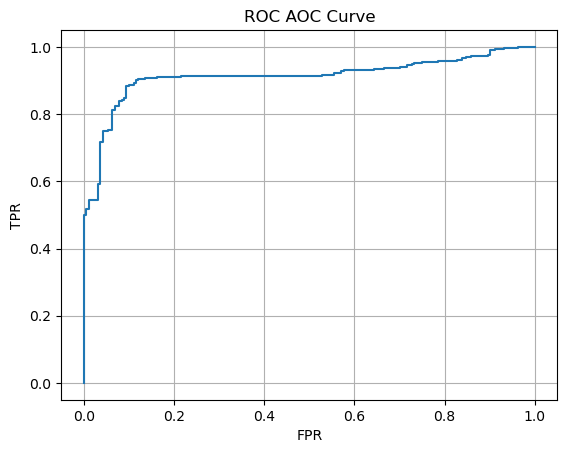

In [41]:
plt.title("ROC AOC Curve")
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()
plt.show()

In [42]:
log3 = LogisticRegression(solver='saga')
log3.fit(xtrain,ytrain)
ypred = log3.predict(xtest)
print('Train',log3.score(xtrain,ytrain))
print('Test',log3.score(xtest,ytest))

Train 0.9018691588785047
Test 0.8921161825726142
